In [9]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits
from matplotlib.patches import Rectangle

In [2]:
with fits.open("../../awsom/mag/adapt40311_03k012_201708211400_i00135600n1.fts.gz") as hdul:
    map_0821 = np.copy(hdul[0].data)
    hdr_0821 = hdul[0].header
with fits.open("../../awsom/mag/adapt40311_03k012_201708212000_i00015600n1.fts.gz") as hdul:
    map_08212 = np.copy(hdul[0].data)
    hdr_08212 = hdul[0].header

with fits.open("../../awsom/mag/adapt40311_03k012_201708221400_i00135600n1.fts.gz") as hdul:
    map_0822 = np.copy(hdul[0].data)
    hdr_0822 = hdul[0].header
with fits.open("../../awsom/mag/adapt40311_03k012_201708270200_i00075600n1.fts.gz") as hdul:
    map_0827 = np.copy(hdul[0].data)
    hdr_0827 = hdul[0].header
with fits.open("../../awsom/mag/adapt40311_03k012_201708231400_i00015600n1.fts.gz") as hdul:
    map_0823 = np.copy(hdul[0].data)
    hdr_0823 = hdul[0].header
with fits.open("../../awsom/mag/adapt40311_03k012_201708262000_i00015600n1.fts.gz") as hdul:
    map_0826 = np.copy(hdul[0].data)
    hdr_0826 = hdul[0].header

In [5]:
hdr_0826

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  360 / length of data axis 1                          
NAXIS2  =                  180 / length of data axis 2                          
NAXIS3  =                   12 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
ADD_DATE=             20170826 / Date for new map                               
ADD_UT  =                  20. / UT for new map                                 
LASTSITE=                    3 / Last obs site: Big Bear (GONG)                 
LAST_OBS=           0.08055556 / Days since last obs merged                     
LAST_RND=                   0. / Time since random flux merged                  
NEVODAYS=             9227.1

In [3]:
hdr_0821

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  360 / length of data axis 1                          
NAXIS2  =                  180 / length of data axis 2                          
NAXIS3  =                   12 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
ADD_DATE=             20170821 / Date for new map                               
ADD_UT  =                  14. / UT for new map                                 
LASTSITE=                    3 / Last obs site: Big Bear (GONG)                 
LAST_OBS=            0.5805556 / Days since last obs merged                     
LAST_RND=                 0.25 / Time since random flux merged                  
NEVODAYS=             9221.9

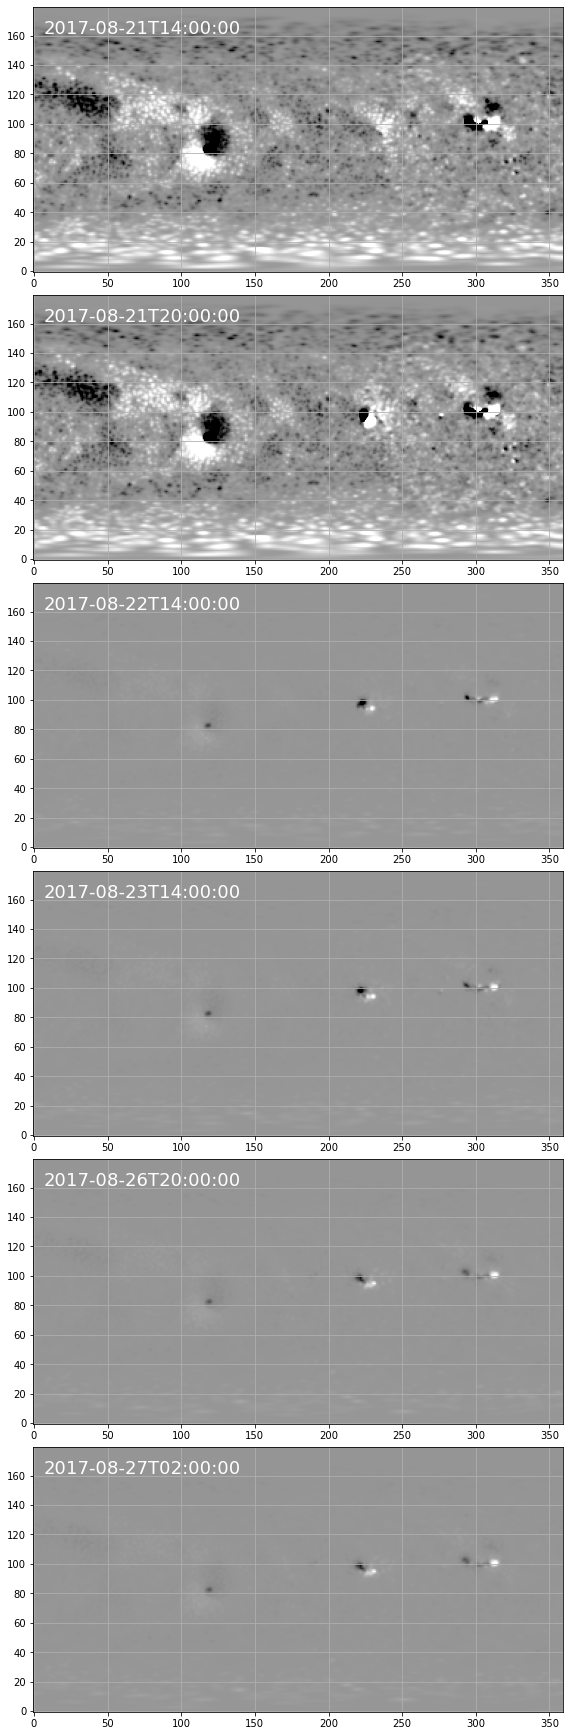

In [4]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(8,24),constrained_layout=True)

ax1.imshow(map_0821[0,:,:],cmap="Greys",origin="lower",vmin=-20,vmax=20)
ax2.imshow(map_08212[0,:,:],cmap="Greys",origin="lower",vmin=-20,vmax=20)
ax3.imshow(map_0822[0,:,:],cmap="Greys",origin="lower",vmin=-500,vmax=500)
ax4.imshow(map_0823[0,:,:],cmap="Greys",origin="lower",vmin=-500,vmax=500)
ax5.imshow(map_0826[0,:,:],cmap="Greys",origin="lower",vmin=-500,vmax=500)
ax6.imshow(map_0827[0,:,:],cmap="Greys",origin="lower",vmin=-500,vmax=500)

ax1.text(0.02,0.95,hdr_0821['MAPTIME'],va="top",ha="left",fontsize=18,color="white",transform=ax1.transAxes)
ax2.text(0.02,0.95,hdr_08212['MAPTIME'],va="top",ha="left",fontsize=18,color="white",transform=ax2.transAxes)
ax3.text(0.02,0.95,hdr_0822['MAPTIME'],va="top",ha="left",fontsize=18,color="white",transform=ax3.transAxes)
ax4.text(0.02,0.95,hdr_0823['MAPTIME'],va="top",ha="left",fontsize=18,color="white",transform=ax4.transAxes)
ax5.text(0.02,0.95,hdr_0826['MAPTIME'],va="top",ha="left",fontsize=18,color="white",transform=ax5.transAxes)
ax6.text(0.02,0.95,hdr_0827['MAPTIME'],va="top",ha="left",fontsize=18,color="white",transform=ax6.transAxes)

for ax_ in (ax1,ax2,ax3,ax4,ax5,ax6):
    ax_.grid("on")

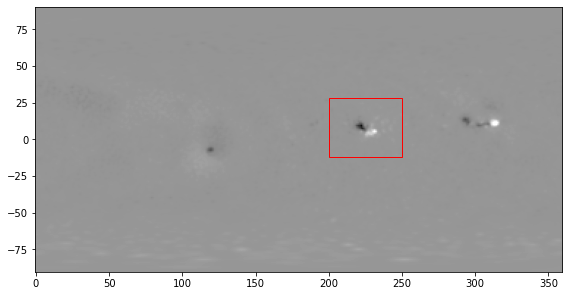

In [14]:
fig,ax = plt.subplots(1,figsize=(8,4),constrained_layout=True)
ax.imshow(map_0826[0,:,:],cmap="Greys",origin="lower",vmin=-500,vmax=500,extent=[-0.5,359.5,-90.5,90.5])

# ax.grid("on")

rec = Rectangle((200,-12),50,40,color="red",fill=False)
ax.add_artist(rec)
